# Installation

It will take some minutes to install GMT in colab. Have a coffee in the meantime.

In [1]:
import sys

!pip install EQViewer

if 'google.colab' in sys.modules:
    !sudo apt update 
    !sudo apt upgrade -y
    !sudo apt install -y build-essential cmake libcurl4-gnutls-dev libnetcdf-dev gdal-bin libgdal-dev libfftw3-dev libpcre3-dev liblapack-dev libblas-dev libglib2.0-dev ghostscript ghostscript-x graphicsmagick ffmpeg xdg-utils
    # clone gmt from source
    !git clone --depth 50 https://github.com/GenericMappingTools/gmt
    # cmake everything
    !cmake /content/gmt
    # build and install
    !cmake --build . --target install
    !git clone https://github.com/ecastillot/EQViewer.git /content/EQViewer

**Please restart your kernel**. And then, enjoy the following

# Viewer
*To read this notebook, we suppose you already see the other [examples](https://github.com/ecastillot/EQViewer/blob/master/examples). Otherwise, take a look on these. It won't take you long.*

Here, we are going to see a project using several objects for high resolution maps and profiles.

In [3]:
from EQViewer.eqviewer import *
import pandas as pd
import numpy as np
import glob
import os
import sys
import pygmt

if 'google.colab' in sys.modules:
    repository_path = "/content/EQViewer"  
else:
    repository_path = os.getcwd()
rep_data = os.path.join(repository_path,"data")
rep_out = os.path.join(repository_path,"docs","figures")

## MulCatalog

In [4]:
catalogpath = os.path.join(rep_data,"earthquakes","catalog.csv")
df = pd.read_csv(catalogpath,parse_dates=["origin_time"])

cat_baseplot = BasePlot(color = "gray",
                    style="c0.1c",
                    size=None,
                    cmap = False,
                    pen = "black",
                    label="all_events")
catalog = Catalog(data=df,baseplot=cat_baseplot)

filter_domain=[-122.92462,-122.76703,38.74915,38.88327]
pol2filter = [(filter_domain[0],filter_domain[2]),
                (filter_domain[0],filter_domain[3]),
                (filter_domain[1],filter_domain[3]),
                (filter_domain[1],filter_domain[2]),
                (filter_domain[0],filter_domain[2])
                ]
catalog1 = catalog.copy()
catalog1.filter_region(polygon=pol2filter)
catalog1.baseplot.style = "c0.2c"
catalog1.baseplot.color = "yellow"
catalog1.baseplot.cmap = False
catalog1.baseplot.label = "Group_1"

filter_domain=[-122.76647,-122.65638,38.74915 ,38.85847] 
pol2filter = [(filter_domain[0],filter_domain[2]),
                (filter_domain[0],filter_domain[3]),
                (filter_domain[1],filter_domain[3]),
                (filter_domain[1],filter_domain[2]),
                (filter_domain[0],filter_domain[2])
                ]
catalog2 = catalog.copy()
catalog2.filter_region(polygon=pol2filter)
catalog2.baseplot.style = "c0.2c"
catalog2.baseplot.color = "red"
catalog2.baseplot.cmap = False
catalog2.baseplot.label = "Group_2"

filter_domain=[-122.75026,-122.56920,38.68506 ,38.80840]  
pol2filter = [(filter_domain[0],filter_domain[2]),
                (filter_domain[0],filter_domain[3]),
                (filter_domain[1],filter_domain[3]),
                (filter_domain[1],filter_domain[2]),
                (filter_domain[0],filter_domain[2])
                ]
catalog3 = catalog.copy()
catalog3.filter_region(polygon=pol2filter)
catalog3.baseplot.style = "c0.2c"
catalog3.baseplot.color = "seagreen"
catalog3.baseplot.cmap = False
catalog3.baseplot.label = "Group_3"

mulcatalog = MulCatalog(catalogs=[catalog1,catalog2,catalog3])
print(mulcatalog.__str__(True))

Catalogs (3 catalogs)
----------------------
1. Catalog | 7158 events 
	period: [20160101T00:38:25 - 20160310T13:17:53]
	depth : [0.0, 13.36]
	magnitude : [0.0, 3.24]
	region: [-122.92, -122.77, 38.75, 38.88]
2. Catalog | 2360 events 
	period: [20160101T00:40:46 - 20160310T13:08:33]
	depth : [0.0, 13.0]
	magnitude : [0.0, 2.98]
	region: [-122.77, -122.66, 38.75, 38.86]
3. Catalog | 2023 events 
	period: [20160101T00:40:46 - 20160310T11:28:54]
	depth : [0.0, 10.64]
	magnitude : [0.0, 2.78]
	region: [-122.75, -122.58, 38.7, 38.81]


## MulWell

In [5]:
injectionpath = os.path.join(rep_data,"wells","injection","injection.csv")
inj_df = pd.read_csv(injectionpath)
inj_baseplot=BasePlot(color="blue",
                    pen="5p,blue",
                    cmap=False)

inj = Injection(data=inj_df,depth_type="TVD",
                    baseplot=inj_baseplot)


survey_path = os.path.join(rep_data,"wells","survey")

well_baseplot = BasePlot(color = None,
                    style=None,
                    cmap = False,
                    pen = "1p,blue",
                    label="well_survey")
inj_baseplot=BasePlot(color="blue",
                    style="c0.3c",
                    pen=None,
                    cmap=True)

inj = Injection(data=inj_df,depth_type="TVD",
                    baseplot=inj_baseplot)

inj_cpt = CPT(color_target="measurement",
                label="Water flow",
                cmap="cool",
                series=[inj.data.measurement.min(),
                        inj.data.measurement.max()],
                reverse=True,
                overrule_bg=True)

wells = []
for path in glob.glob(os.path.join(survey_path,"*")):
    df = pd.read_csv(path)
    wellname = os.path.basename(path).split(".")[0]
    well_with_inj = Well(data=df,name=wellname,
                        baseplot=well_baseplot,injection=inj)
    wells.append(well_with_inj)
mulwell = MulWell(wells)

print(mulwell.__str__(True))

MulWell (14 wells)
-------------------
1. Well | starting in (lon,lat): (-122.75, 38.8) 
	depth : [-78.71, 2028.38]
	region: [-122.75, -122.74, 38.8, 38.81]
2. Well | starting in (lon,lat): (-122.75, 38.8) 
	depth : [-78.71, 2028.38]
	region: [-122.76, -122.74, 38.8, 38.81]
3. Well | starting in (lon,lat): (-122.75, 38.8) 
	depth : [-78.71, 2028.38]
	region: [-122.76, -122.75, 38.79, 38.8]
4. Well | starting in (lon,lat): (-122.83, 38.83) 
	depth : [-78.71, 2028.38]
	region: [-122.84, -122.82, 38.83, 38.85]
5. Well | starting in (lon,lat): (-122.83, 38.83) 
	depth : [-78.71, 2028.38]
	region: [-122.84, -122.83, 38.82, 38.83]
6. Well | starting in (lon,lat): (-122.75, 38.8) 
	depth : [-78.71, 2028.38]
	region: [-122.77, -122.75, 38.79, 38.81]
7. Well | starting in (lon,lat): (-122.83, 38.83) 
	depth : [-78.71, 2028.38]
	region: [-122.83, -122.82, 38.83, 38.84]
8. Well | starting in (lon,lat): (-122.83, 38.83) 
	depth : [-78.71, 2028.38]
	region: [-122.84, -122.82, 38.81, 38.83]
9. Well 

## MulFM

In [6]:
fmpath = os.path.join(rep_data,"fm","fm.csv")
df = pd.read_csv(fmpath)

basemeca = BaseMeca(scale="0.5c",color="green",cmap=False,
                transparency=None)
fm = FM(data=df,basemeca=basemeca)
mulfm = MulFM([fm])
print(mulfm.__str__(True))

fms (1 fms)
------------
1. Catalog | 11 focal mechanisms 
	depth : [1.5, 12.0]
	magnitude : [3.9, 5.2]
	region: [-122.86, -122.74, 38.74, 38.85]


## MulProfile

In [7]:
baseprofile = BaseProfile(projection="x5c/-5c",depth_lims =[0,4],
                        grid=(1,1),
                        output_unit="km")
profile1 = Profile(name=("A","A'"),      
            coords=((-122.88243,38.85673),(-122.69410,38.78445)),
            width=(-1.5,1.55),
            baseprofile=baseprofile
                )
profile2 = Profile(name=("B","B'"),      
            coords=((-122.84722,38.80840),(-122.78296,38.85281)),
            width=(-1.5,1.55),
            baseprofile=baseprofile
                )
profile3 = Profile(name=("C","C'"),      
            coords=((-122.76228,38.78358),(-122.72036,38.80710)),
            width=(-1.5,1.55),
            baseprofile=baseprofile
                )
mulprofile = MulProfile(profiles=[profile1,profile2,profile3])
print(mulprofile.__str__(True))

Profiles (3 profiles)
----------------------
1. Profile  A-A' 
	A: (-122.88243, 38.85673)
	A': (-122.6941, 38.78445)
	width: (-1.5, 1.55) m
	output_unit: km
2. Profile  B-B' 
	B: (-122.84722, 38.8084)
	B': (-122.78296, 38.85281)
	width: (-1.5, 1.55) m
	output_unit: km
3. Profile  C-C' 
	C: (-122.76228, 38.78358)
	C': (-122.72036, 38.8071)
	width: (-1.5, 1.55) m
	output_unit: km


# Viewer

## Map

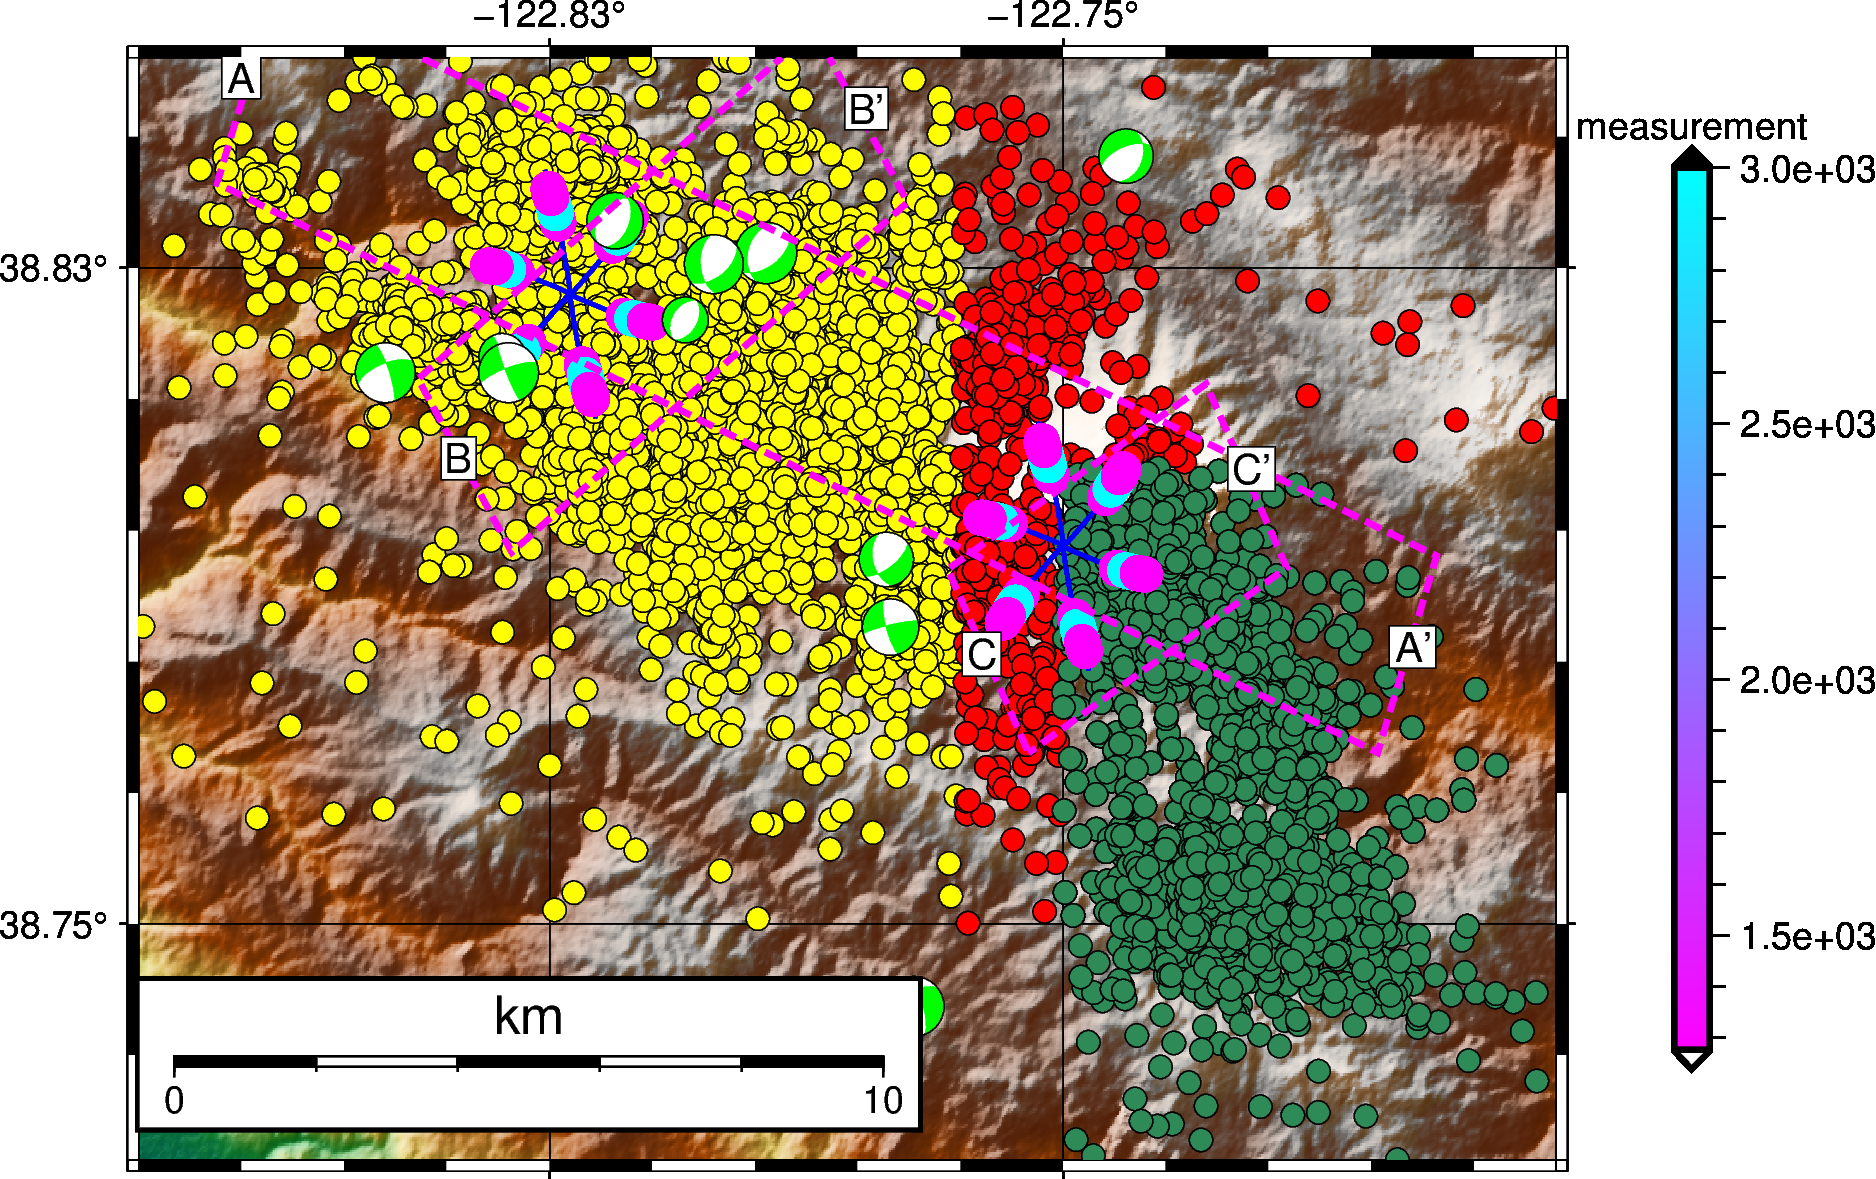

In [8]:
fig = pygmt.Figure() 
fig.basemap(region=[-122.9,-122.67,38.72,38.86],
            projection="M12c", 
            frame=["af","WNse"])
fig.grdimage(
            '@earth_relief_01s', #01m resolution 
            cmap=True,
            shading=True,
            frame=["afg","WNse"]
        )
fig.coast(
            shorelines=True,
            borders='1/1p,black',
            frame=["afg","WNse"],
        )
catfig = mulcatalog.plot_map(fig)
mulwellfig = mulwell.plot_map(fig=catfig)
mulfmfig = fm.plot_map(fig=mulwellfig)
mulprofilefig = mulprofile.plot_in_map(fig=mulfmfig,rescale=False)
mulprofilefig.basemap(map_scale=f"jBL+o0.3c/0.7c+w{10}k+f+lkm+at",box='+gwhite+p1p')
mulprofilefig.show()

## Profiles

In [9]:
mulprofile.add_mulobject(mulcatalog,depth_unit="km",verbose=False)
mulprofile.add_mulobject(mulwell,depth_unit="m",verbose=False)
mulprofile.add_mulobject(mulfm,depth_unit="km",verbose=False)

1 -> ('A', "A'")
2 -> ('B', "B'")
3 -> ('C', "C'")


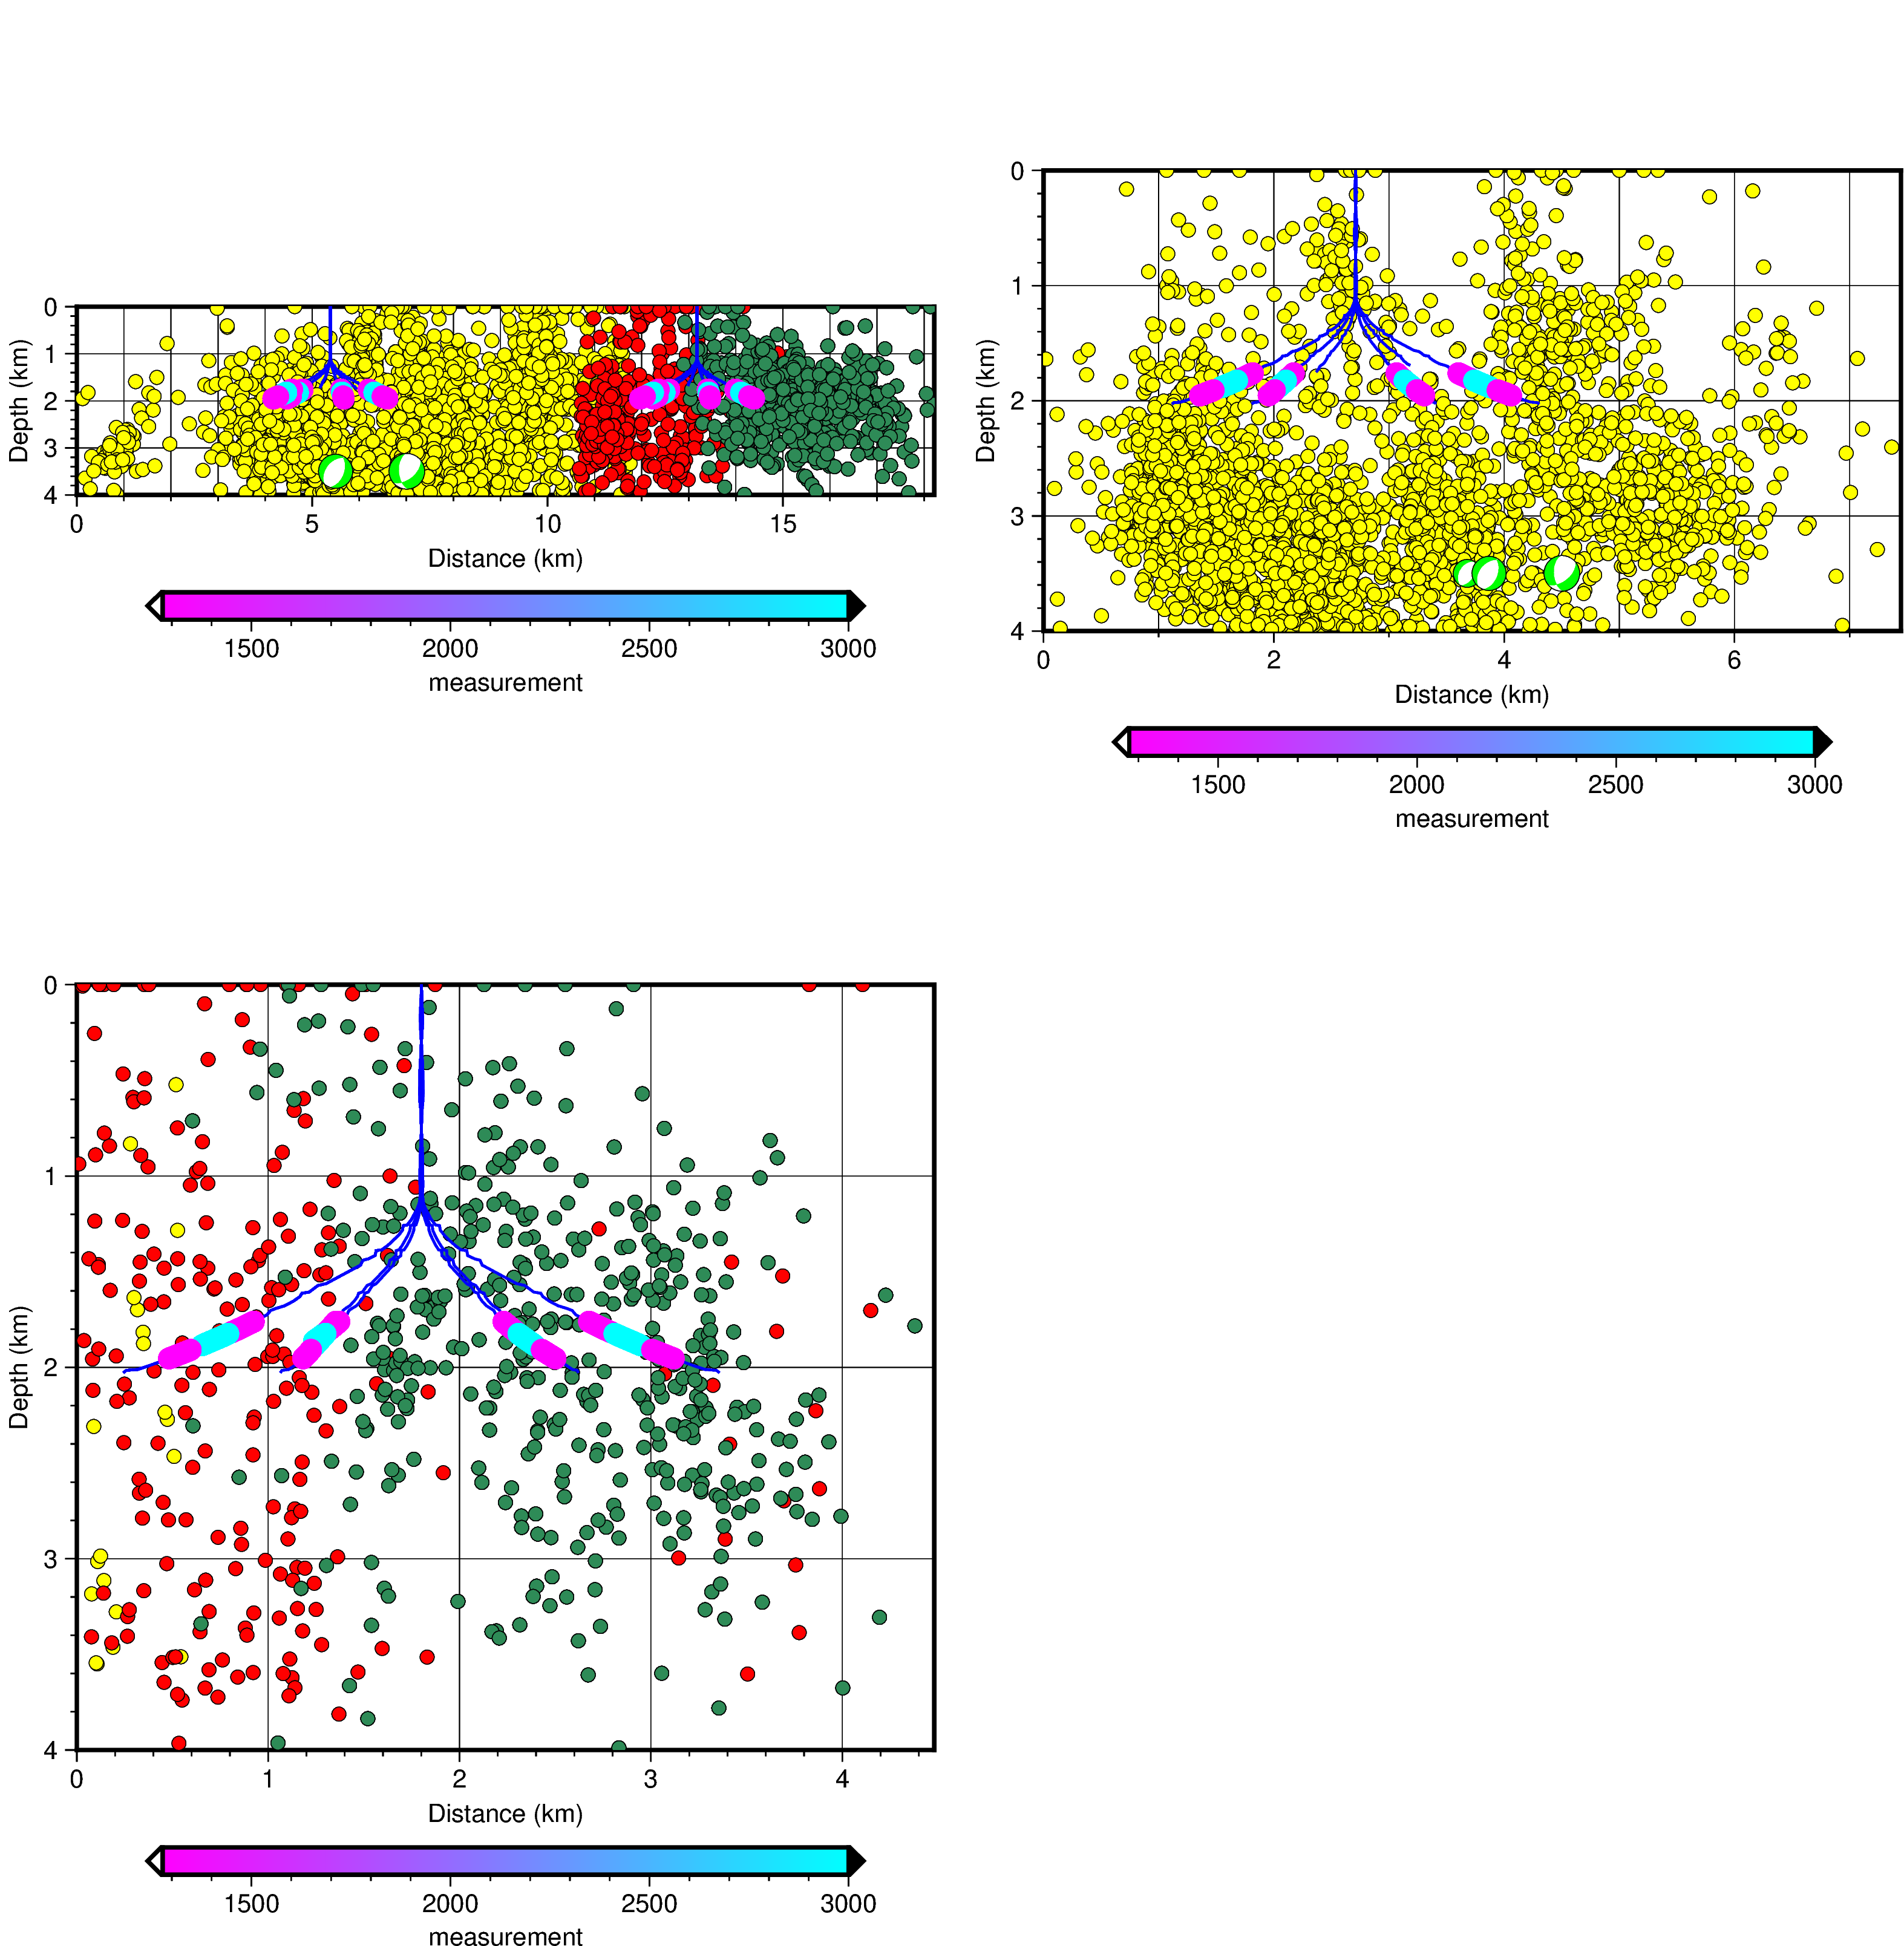

In [10]:
mulprofig = mulprofile.plot(
                frame="WSrt",
                subsize = ("12c", "12c"),
                figsize=None,
                margins=["0.5c","0.5c","0.5c","0.5c"])
mulprofig.show()